## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [172]:
"""Reading & understanding the data"""
df = pd.read_csv("ab_data.csv")
df.head(20)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

c. The number of unique users in the dataset.

In [173]:
"""getting knowledge about number of rows and columns of dataset"""
print("The number of rows in the dataset is {}".format(df.shape[0]))

The number of rows in the dataset is 294478


In [174]:
"""by using nunique() function we can easily investigate number of unique values"""
print("The number of unique users in the dataset is {}".format(df["user_id"].nunique()))

The number of unique users in the dataset is 290584


d. The proportion of users converted.

In [175]:
"""check the values of 'converted column', if they are all 1 and 0, we can use the mean() formula in order to get proportion"""
df.groupby("converted").count() #pure 0 & 1

"""mean of 1 illustrates the proportion"""
print("The proportion of converted users is {}".format(df["converted"].mean()))

The proportion of converted users is 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [176]:
"""1) Define the number of rows which treatment lines up with old page"""
dontlineup_1 = df.query("group == 'treatment' & landing_page == 'old_page'")

"""2) Define the number of rows which new_page lines up with control"""
dontlineup_2 = df.query("landing_page == 'new_page' & group == 'control'")

"""by putting together item 1 and item 2 we can get all possibilities which new_page & treatment do not line up"""
print("The number of times the new_page and treatment dont line up is {}".format(len(dontlineup_1) + len(dontlineup_2)))


The number of times the new_page and treatment dont line up is 3893


f. Do any of the rows have missing values?

In [177]:
"""Its easy to do with issnull().any() formula"""
print("No null value observed\n" + "\n{}".format(df.isnull().any()))

No null value observed

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [178]:
"""1)Deleting the rows which treatment is not aligned with new page"""
df.drop(df.query("group == 'treatment' & landing_page == 'old_page'").index, inplace = True)

"""2)Deleting the rows which control is not aligned with old %page"""
df.drop(df.query("group == 'control' & landing_page == 'new_page'").index, inplace = True)

"""If calculations are OK, we need to have lower row number"""
df.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [179]:
"""df2 is ready to investigate !"""
df.to_csv("ab_data_edited.csv", index = False)
df2 = pd.read_csv("ab_data_edited.csv")

In [180]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [181]:
"""It can be done by nunique() formula"""
print("There are {} unique user_id's in the dataset of df2".format(df2["user_id"].nunique()))

There are 290584 unique user_id's in the dataset of df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [182]:
"""I added a boolean column of 'duplicated' which shows the duplicate status of every user_id by printing 'True' and 'False"""
"""By filtering duplicated column with 'True' we can easily observe not only the duplicated user_id value 
   but also whole information about repated value"""

df2["duplicated"] = df2["user_id"].duplicated()
df3 = df2.query("duplicated == True")
df3

,user_id,timestamp,group,landing_page,converted,duplicated
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


In [183]:
print("The repeated user_id is 773192\n")

The repeated user_id is 773192



c. What is the row information for the repeat **user_id**? 

In [184]:
print("The repeated user_id's row is 2862\n")

The repeated user_id's row is 2862



d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [185]:
"""we can drop duplicates with below formula"""
df2.drop_duplicates(keep = False, inplace = True)
df2.info()

"""above formula did not work ! , we need to investigate why"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 290584
Data columns (total 6 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
duplicated      290585 non-null bool
dtypes: bool(1), int64(2), object(3)
memory usage: 13.6+ MB


'above formula did not work ! , we need to investigate why'

In [186]:
"""we have 2 user_id of 773192 with different timestamps, therefore drop_duplicates did not work, we need to delete them with
   a different way"""
df2userid = df2.query("user_id == '773192'")
df2userid

,user_id,timestamp,group,landing_page,converted,duplicated
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


In [187]:
"""I am going to delete row of 2862 by using df.drop(df.index[2862]), therefore I can get rid of repated 2862th row"""
df2 = df2.drop(df2.index[2862])

In [188]:
"""by deleting row of 2862, non duplicated status is provided"""
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
duplicated           1
dtype: int64

In [189]:
"""check again the duplicate status"""
df2.duplicated().any() #no duplicated value !

False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [190]:
"""Since values are 1 & 0, we can calculate mean for learning probability of an individual converting """
print("The probability of an individual converting regardless of the page is {}".format(df2["converted"].mean()))

The probability of an individual converting regardless of the page is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [191]:
"""By filtering group column with 'control' we can calculate the probability for an individual was in the control group"""
df_control = df2.query("group == 'control'")
print("The probability of an individual converting that was in control group is {}".format(df_control["converted"].mean()))

The probability of an individual converting that was in control group is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [192]:
"""By filtering group column with 'treatment' we can calculate the probability for an individual was in the control group"""
df_treatment = df2.query("group == 'treatment'")
df_treatment["converted"].mean()
print("The probability of an individual converting that was in treatment group is {}".format(df_treatment["converted"].mean()))

The probability of an individual converting that was in treatment group is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [193]:
"""We can not use the method which we used above"""
"""The proportion of new page row number to whole row number will give us the probability"""
#calculation of new_page's row number
df_new_page = df2.query("landing_page == 'new_page'")
df_new_page.shape[0]

#calculating whole dataset's row number
df2.shape[0]

#probability is 
print("The probability that an individual received the new page is {}".format(df_new_page.shape[0] / df2.shape[0]))


The probability that an individual received the new page is 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

### The results which we have calculated above are not sufficient enough to state / decide which page has more conversion. We have calculated probabilities about groups but they may only help us to understand just only group effect. To sum up, there might be another critical factors / contributers which have large impact to page conversions. Much more data required


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Ho : **$p_{new}$** <= **$p_{old}$**

#### H1 : **$p_{new}$** > **$p_{old}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [211]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [195]:
pnew = df["converted"].mean()
print("The convert rate for Pnew is {}".format(pnew))

The convert rate for Pnew is 0.11959667567149027


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [196]:
pold = df["converted"].mean()
print("The convert rate for Pold is {}".format(pold))

The convert rate for Pold is 0.11959667567149027


c. What is $n_{new}$?

In [197]:
nnew = len(df.query("group == 'treatment'"))
nnew

145311

d. What is $n_{old}$?

In [198]:
nold = len(df.query("group == 'control'"))
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [199]:
new_page_converted = np.random.choice([0, 1], size = nnew, p = [pnew, (1-pnew)])
# new_page_converted.shape --> used code in order to check if there is something wrong

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [200]:
old_page_converted = np.random.choice([0, 1], size = nold, p = [pold, (1-pold)])
# old_page_converted.shape -->  used code in order to check if there is something wrong

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [213]:
pdiff = new_page_converted.mean() - old_page_converted.mean()
pdiff

-0.00076784462063927972

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [202]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=nnew, p=[pnew, (1-pnew)]).mean()
    old_page_converted = np.random.choice([0, 1], size=nold, p=[pold, (1-pold)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

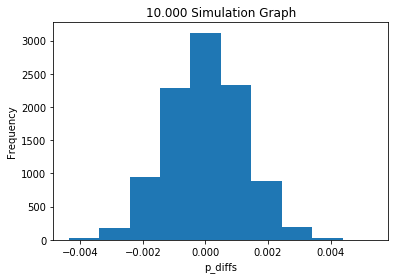

In [203]:
"""Creating graph"""
plt.hist(p_diffs)
plt.xlabel("p_diffs")
plt.title("10.000 Simulation Graph")
plt.ylabel("Frequency");
#it is normally distributed - perfect!

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [204]:
"""calculating the difference in ab_data.csv"""
df_treatment = df.query("group == 'treatment'")
df_control = df.query("group == 'control'")
act_diff = df_treatment["converted"].mean() - df_control["converted"].mean()
act_diff

-0.0015790565976871451

In [205]:
"""Converting p_diffs into array"""
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00259173,  0.0011181 , -0.00084364, ...,  0.00104215,
        0.0006774 , -0.00076784])

In [206]:
"""The proportion of the p_diffs greater than the actual difference observed in ab_data.csv is calculated below"""
(act_diff < p_diffs).mean()

0.90369999999999995

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## Answers:

### 1) P-Value has been calculated

### 2) The definition of a P-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### 3) Acccording to classes which I have watched if P-Value is higher than Error Type Alpha (0.05) we fail to reject the null. This means we are stick to Ho hypostesis and we can say that new pages have no improvement regarding to old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [207]:
import statsmodels.api as sm

convert_old = sum(df.query("group == 'control'")["converted"])
convert_new = sum(df.query("group == 'treatment'")["converted"])
n_old = len(df.query("group == 'control'"))
n_new = len(df.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [208]:
z_scorep_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print("Z-score & P-value has been illustrated respectively\n" + "{}".format(z_scorep_value)) 

Z-score & P-value has been illustrated respectively
(1.3116075339133115, 0.90517370514059103)


In [209]:
from scipy.stats import norm
print("Critical value of Z in 95% confidence interval is {}".format(norm.ppf(1-(0.05))))

Critical value of Z in 95% confidence interval is 1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## Answers

### 1) In 95% confidence interval level critical Z-Value is 1.64. Based on our data Z-Value is 1.31 and this is also confirms that "We are fail to reject Ho - Stick to Ho Hyp."

### 2) Based On P Values on J & K are almost the same and far higher than alpha 0.05

### 3) values in J are align with findings in K

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [210]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0